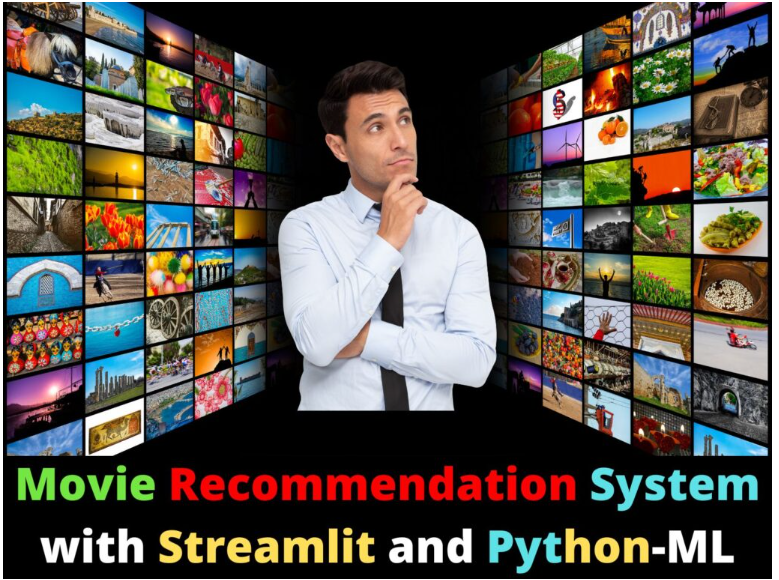

### Data Processing

In [2]:
import numpy as np
import pandas as pd

In [3]:
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

### Merging the datasets:

In [4]:
movies = movies.merge(credits,on='title')
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


### Remove unnecessary columns:

In [5]:
movies = movies[['id','title','overview','genres','keywords','cast','crew']]
movies.head(1)

,id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


### Check and Remove Missing data:

In [6]:
movies.isnull().sum()

id          0
title       0
overview    3
genres      0
keywords    0
cast        0
crew        0
dtype: int64

#### There are 3 missing values in the overview. Let’s drop them.

In [7]:
movies.dropna(inplace=True)

In [8]:
movies.isnull().sum()

id          0
title       0
overview    0
genres      0
keywords    0
cast        0
crew        0
dtype: int64

#### Check for Duplicate data:

In [9]:
movies.duplicated().sum()

np.int64(0)

#### Preprocess ‘genres’:

In [10]:
movies.iloc[0].genres

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [11]:
import ast
ast.literal_eval('[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]')

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

#### Now, let’s use this function and write a helper function for our main aim, i.e. to convert into the list of names.

In [12]:
def convert(obj):
    L = []
    for i in ast.literal_eval(obj):
        L.append(i['name'])
    return L

In [13]:
movies['genres'].apply(convert)

0       [Action, Adventure, Fantasy, Science Fiction]
1                        [Adventure, Fantasy, Action]
2                          [Action, Adventure, Crime]
3                    [Action, Crime, Drama, Thriller]
4                [Action, Adventure, Science Fiction]
                            ...                      
4804                        [Action, Crime, Thriller]
4805                                [Comedy, Romance]
4806               [Comedy, Drama, Romance, TV Movie]
4807                                               []
4808                                    [Documentary]
Name: genres, Length: 4806, dtype: object

#### And it’s done. It is clearly converted into the desired format! Let’s now store this change in the same column.

In [14]:
movies['genres'] = movies['genres'].apply(convert)

### Preprocess ‘keywords’:

In [15]:
movies['keywords'] = movies['keywords'].apply(convert)


### Preprocess ‘cast’:

In [16]:
movies['cast'][0]

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

-We have this much amount of value in here. But we just need the top 3 actors’ names, i.e. 
-How do we do that? We’ll use the same ‘convert’ function and set a counter for 3 values.

In [17]:
def convert3(obj):
    L = []
    c = 0
    for i in ast.literal_eval(obj):
        if (c!=3):
            L.append(i['name'])
            c+=1
        else:
            break
    return L
        

In [18]:
movies['cast'] = movies['cast'].apply(convert3)

### Preprocessing for ‘crew’:

In [19]:
movies['crew'][0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

#### ‘crew’ contains a list of dictionaries with details of the job of crew members. We need the ‘director’ name from this data, hence we need to extract the job ‘Director’.

In [20]:
def fetchdirector(obj):
    L =[]
    for i in ast.literal_eval(obj):
        if (i['job'] == 'Director'):
            L.append(i['name'])
            break
    return L

In [21]:
movies['crew'] = movies['crew'].apply(fetchdirector)

In [22]:
movies

,id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]
...,...,...,...,...,...,...,...
4804,9367,El Mariachi,El Mariachi just wants to play his guitar and ...,"[Action, Crime, Thriller]","[united states–mexico barrier, legs, arms, pap...","[Carlos Gallardo, Jaime de Hoyos, Peter Marqua...",[Robert Rodriguez]
4805,72766,Newlyweds,A newlywed couple's honeymoon is upended by th...,"[Comedy, Romance]",[],"[Edward Burns, Kerry Bishé, Marsha Dietlein]",[Edward Burns]
4806,231617,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...","[Comedy, Drama, Romance, TV Movie]","[date, love at first sight, narration, investi...","[Eric Mabius, Kristin Booth, Crystal Lowe]",[Scott Smith]
4807,126186,Shanghai Calling,When ambitious New York attorney Sam is sent t...,[],[],"[Daniel Henney, Eliza Coupe, Bill Paxton]",[Daniel Hsia]


### Preprocess for ‘overview’:

In [23]:
movies['overview'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

#### ‘overview’ is actually a string and all other columns are lists. Hence, we will convert the string to the list.

How do we do that? We’ll just split the strings.

In [24]:
movies['overview'] = movies['overview'].apply(lambda x:x.split())

Now that all is done, the only left is to concatenate the above-preprocessed columns into single ‘tags’ (as we have discussed) and then convert this concatenated list to a string to become a paragraph.

But the problem is in the columns ‘keywords’, ‘cast’, and ‘crew’, the content is separated by white spaces and we don’t want them to scatter while we concatenate and build our model otherwise it will lead to low efficiency.

for eg., two people might have the same first name, here in the case of ‘Sam Wothington’ and ‘Sam Mendes’. We don’t want our model to confused and recommended wrong.

How do we do that? We’ll just replace the ” ” with “” for every column.

In [25]:
movies['genres'] = movies['genres'].apply(lambda x:[i.replace(" ","") for i in x])
movies['keywords'] = movies['keywords'].apply(lambda x:[i.replace(" ","") for i in x])
movies['cast'] = movies['cast'].apply(lambda x:[i.replace(" ","") for i in x])
movies['crew'] = movies['crew'].apply(lambda x:[i.replace(" ","") for i in x])

In [26]:
movies['tags'] = movies['overview'] + movies['genres'] + movies['cast'] + movies['crew']
movies.head()

,id,title,overview,genres,keywords,cast,crew,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes],"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan],"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton],"[John, Carter, is, a, war-weary,, former, mili..."


Here, we can see that the new ‘tags’ have been created.

Now our new dataframe will only contain 3 columns: ‘id’, ‘title’, ‘tags’.

In [27]:
new_df = movies[['id','title','tags']]
new_df.head()

,id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."


This is what we want. Now the ‘tags’ should be a paragraph, i.e. a string to make it understood by our model. Let’s convert it.

In [28]:
new_df['tags'] = new_df['tags'].apply(lambda x: " ".join(x))

C:\Users\DanyalAkhtarSiddiqui\AppData\Local\Temp\ipykernel_10720\1824047427.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x: " ".join(x))


In [29]:
new_df['tags'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Action Adventure Fantasy ScienceFiction SamWorthington ZoeSaldana SigourneyWeaver JamesCameron'

It is best practice to convert this into lower case alphabets and the paragraph is now done.

In [30]:
new_df['tags'] = new_df['tags'].apply(lambda x:x.lower())

C:\Users\DanyalAkhtarSiddiqui\AppData\Local\Temp\ipykernel_10720\3214958533.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x:x.lower())


In [31]:
new_df['tags'][0]   # Data processing is done.

'in the 22nd century, a paraplegic marine is dispatched to the moon pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. action adventure fantasy sciencefiction samworthington zoesaldana sigourneyweaver jamescameron'

## Building the model

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
cv =CountVectorizer(max_features=500, stop_words='english')

Parameters taken are max_features is the number of words and stop_words in English to remove them.

Now, let’s convert it into a vector using the ‘cv’ object.

In [33]:
vector = cv.fit_transform(new_df['tags']).toarray()    #fit_transform() returns a scikit sparse matrix, hence it is necessary to convert it into an np array.

In [34]:
cv.get_feature_names_out()   #We can actually get these 5000 words or feature names.

array(['000', 'accident', 'accidentally', 'action', 'adventure', 'affair',
       'age', 'agent', 'alien', 'alive', 'america', 'american', 'ancient',
       'angeles', 'animation', 'apart', 'army', 'arrives', 'art',
       'artist', 'attack', 'attempt', 'attempts', 'away', 'baby', 'bad',
       'band', 'bank', 'based', 'battle', 'beautiful', 'begin', 'begins',
       'believe', 'believes', 'ben', 'best', 'better', 'big', 'black',
       'blood', 'body', 'bond', 'book', 'born', 'boss', 'boy',
       'boyfriend', 'break', 'bring', 'brings', 'british', 'brother',
       'brothers', 'business', 'california', 'called', 'captain', 'car',
       'career', 'case', 'caught', 'century', 'chance', 'change',
       'changes', 'characters', 'charlie', 'child', 'childhood',
       'children', 'christmas', 'cia', 'city', 'class', 'close', 'club',
       'coach', 'college', 'come', 'comedy', 'comes', 'coming',
       'community', 'company', 'control', 'cop', 'country', 'couple',
       'crash', 'creat

These words also contain numbers or years that are most frequent.

Now, this feature contains similar words in a different form. For eg. accident, accidentally, and accidental are the same words. We need to fix this issue. For this, we’ll use stemming from NLTK. To install nltk, you can follow:

In [35]:
import nltk
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()     #PorterStemmer’s class removes commoner morphological and inflexional endings from words in English.v Let’s take a look at what it actually does.

In [36]:
def stem(text):
    y = []
    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)

In [37]:
new_df['tags'] = new_df['tags'].apply(stem)

C:\Users\DanyalAkhtarSiddiqui\AppData\Local\Temp\ipykernel_10720\3213734980.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(stem)


In [38]:
new_df['tags']

0       in the 22nd century, a parapleg marin is dispa...
1       captain barbossa, long believ to be dead, ha c...
2       a cryptic messag from bond’ past send him on a...
3       follow the death of district attorney harvey d...
4       john carter is a war-weary, former militari ca...
                              ...                        
4804    el mariachi just want to play hi guitar and ca...
4805    a newlyw couple' honeymoon is upend by the arr...
4806    "signed, sealed, delivered" introduc a dedic q...
4807    when ambiti new york attorney sam is sent to s...
4808    ever sinc the second grade when he first saw h...
Name: tags, Length: 4806, dtype: object

Now, for the next step we have a total of 4806 movies and every movie is a vector. Now, we will calculate the distance between every movie for movie. This distance is not Euclidean’s distance, but this will be the cosine angle between the two movies. Lesser the distance, the more the similarity between them. This distance is nothing but the cosine similarity. Sklearn has a function to calculate this similarity.

In [39]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(vector)

array([[1.        , 0.35355339, 0.18898224, ..., 0.        , 0.        ,
        0.        ],
       [0.35355339, 1.        , 0.17817416, ..., 0.08084521, 0.        ,
        0.        ],
       [0.18898224, 0.17817416, 1.        , ..., 0.06482037, 0.        ,
        0.        ],
       ...,
       [0.        , 0.08084521, 0.06482037, ..., 1.        , 0.17149859,
        0.0766965 ],
       [0.        , 0.        , 0.        , ..., 0.17149859, 1.        ,
        0.1490712 ],
       [0.        , 0.        , 0.        , ..., 0.0766965 , 0.1490712 ,
        1.        ]])

Here, you can see the similarity of every movie with every movie. Look that the similarity of a movie with itself is 1.00. The similarity diagonally will always 1.

If we try to figure out the shape of this similarity, we will get: 4806,4806 i.e. similarity is calculated for every movie with every other movie.

In [40]:
similarity = cosine_similarity(vector)
similarity

array([[1.        , 0.35355339, 0.18898224, ..., 0.        , 0.        ,
        0.        ],
       [0.35355339, 1.        , 0.17817416, ..., 0.08084521, 0.        ,
        0.        ],
       [0.18898224, 0.17817416, 1.        , ..., 0.06482037, 0.        ,
        0.        ],
       ...,
       [0.        , 0.08084521, 0.06482037, ..., 1.        , 0.17149859,
        0.0766965 ],
       [0.        , 0.        , 0.        , ..., 0.17149859, 1.        ,
        0.1490712 ],
       [0.        , 0.        , 0.        , ..., 0.0766965 , 0.1490712 ,
        1.        ]])

For eg., if we want to see similarity score of the first movie with all movies, I can simply run the code as:

In [41]:
cosine_similarity(vector)[0]

array([1.        , 0.35355339, 0.18898224, ..., 0.        , 0.        ,
       0.        ])

Now, we’ll design a function to recommend the movies.

How do we design it? First, we will find the similarity vector of the movie provided in the input. Then we’ll sort these numbers in increasing order and display the top 5 movies out of corresponding similarity scores.

How do we find the index of the movie? This is how:

In [42]:
def recommend(movie):
    #find the index of the movies
    movie_index = new_df[new_df['title']==movie].index[0]
    distances = similarity[movie_index]
    movies_list = sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:6]
    

    #to fetch movies from indeces
    for i in movies_list:
        print(new_df.iloc[i[0]].title)

In [44]:
recommend('Twilight')

Edward Scissorhands
The Age of Adaline
Pete's Dragon
Mumford
The Twilight Saga: Eclipse


In [45]:
import pickle
pickle.dump(new_df.to_dict(),open('movies.pkl','wb'))

In [46]:
pickle.dump(similarity,open('similarity.pkl','wb'))